In [1]:
# Importing the necessary libraries
import os
import tensorflow as tf
import albumentations as albu
import numpy as np
import gc
import pickle
import matplotlib.pyplot as plt
from keras.callbacks import CSVLogger
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_score, precision_score, recall_score, accuracy_score, f1_score
from ModelArchitecture.DiceLoss import dice_metric_loss
from ModelArchitecture import DUCK_Net
from ImageLoader import ImageLoader2D


In [2]:
img_size = 640
dataset_type = 'kvasir' # Options: kvasir/cvc-clinicdb/cvc-colondb/etis-laribpolypdb
learning_rate = 1e-4
seed_value = 58800

filters = 17 # Number of filters, the paper presents the results with 17 and 34
optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)

In [3]:
model = DUCK_Net.create_model(img_height=img_size, img_width=img_size, input_chanels=3, out_classes=3, starting_filters=filters)

Starting DUCK-Net


In [4]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 640, 640, 3  0           []                               
                                )]                                                                
                                                                                                  
 batch_normalization (BatchNorm  (None, 640, 640, 3)  12         ['input_1[0][0]']                
 alization)                                                                                       
                                                                                                  
 conv2d_20 (Conv2D)             (None, 640, 640, 17  476         ['batch_normalization[0][0]']    
                                )                                                             

                                                                                                  
 batch_normalization_1 (BatchNo  (None, 640, 640, 17  68         ['conv2d_5[0][0]']               
 rmalization)                   )                                                                 
                                                                                                  
 batch_normalization_6 (BatchNo  (None, 640, 640, 17  68         ['conv2d_11[0][0]']              
 rmalization)                   )                                                                 
                                                                                                  
 batch_normalization_12 (BatchN  (None, 640, 640, 17  68         ['conv2d_17[0][0]']              
 ormalization)                  )                                                                 
                                                                                                  
 batch_nor

 rmalization)                   )                                                                 
                                                                                                  
 batch_normalization_14 (BatchN  (None, 640, 640, 17  68         ['add_2[0][0]']                  
 ormalization)                  )                                                                 
                                                                                                  
 batch_normalization_23 (BatchN  (None, 640, 640, 17  68         ['add_5[0][0]']                  
 ormalization)                  )                                                                 
                                                                                                  
 batch_normalization_25 (BatchN  (None, 640, 640, 17  68         ['conv2d_29[0][0]']              
 ormalization)                  )                                                                 
          

                                                                                                  
 add_9 (Add)                    (None, 320, 320, 34  0           ['batch_normalization_37[0][0]', 
                                )                                 'conv2d_39[0][0]']              
                                                                                                  
 add_12 (Add)                   (None, 320, 320, 34  0           ['batch_normalization_46[0][0]', 
                                )                                 'conv2d_48[0][0]']              
                                                                                                  
 batch_normalization_38 (BatchN  (None, 320, 320, 34  136        ['add_9[0][0]']                  
 ormalization)                  )                                                                 
                                                                                                  
 batch_nor

                                )                                                                 
                                                                                                  
 conv2d_35 (Conv2D)             (None, 320, 320, 34  10438       ['batch_normalization_31[0][0]'] 
                                )                                                                 
                                                                                                  
 add_8 (Add)                    (None, 320, 320, 34  0           ['batch_normalization_34[0][0]', 
                                )                                 'conv2d_36[0][0]']              
                                                                                                  
 add_10 (Add)                   (None, 320, 320, 34  0           ['batch_normalization_40[0][0]', 
                                )                                 'conv2d_42[0][0]']              
          

                                                                                                  
 batch_normalization_63 (BatchN  (None, 160, 160, 68  272        ['conv2d_66[0][0]']              
 ormalization)                  )                                                                 
                                                                                                  
 batch_normalization_72 (BatchN  (None, 160, 160, 68  272        ['conv2d_75[0][0]']              
 ormalization)                  )                                                                 
                                                                                                  
 conv2d_67 (Conv2D)             (None, 160, 160, 68  41684       ['batch_normalization_63[0][0]'] 
                                )                                                                 
                                                                                                  
 conv2d_76

 ormalization)                  )                                                                 
                                                                                                  
 batch_normalization_61 (BatchN  (None, 160, 160, 68  272        ['conv2d_64[0][0]']              
 ormalization)                  )                                                                 
                                                                                                  
 conv2d_62 (Conv2D)             (None, 160, 160, 68  4692        ['batch_normalization_54[0][0]'] 
                                )                                                                 
                                                                                                  
 batch_normalization_67 (BatchN  (None, 160, 160, 68  272        ['conv2d_70[0][0]']              
 ormalization)                  )                                                                 
          

                                                                                                  
 conv2d_99 (Conv2D)             (None, 80, 80, 136)  166600      ['batch_normalization_96[0][0]'] 
                                                                                                  
 batch_normalization_97 (BatchN  (None, 80, 80, 136)  544        ['conv2d_99[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 conv2d_97 (Conv2D)             (None, 80, 80, 136)  18632       ['batch_normalization_81[0][0]'] 
                                                                                                  
 add_27 (Add)                   (None, 80, 80, 136)  0           ['batch_normalization_97[0][0]', 
                                                                  'conv2d_97[0][0]']              
          

 ormalization)                                                                                    
                                                                                                  
 batch_normalization_85 (BatchN  (None, 80, 80, 136)  544        ['conv2d_86[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_88 (BatchN  (None, 80, 80, 136)  544        ['conv2d_90[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 conv2d_88 (Conv2D)             (None, 80, 80, 136)  18632       ['batch_normalization_81[0][0]'] 
                                                                                                  
 batch_nor

 batch_normalization_124 (Batch  (None, 40, 40, 272)  1088       ['conv2d_125[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 conv2d_123 (Conv2D)            (None, 40, 40, 272)  74256       ['batch_normalization_108[0][0]']
                                                                                                  
 add_35 (Add)                   (None, 40, 40, 272)  0           ['batch_normalization_124[0][0]',
                                                                  'conv2d_123[0][0]']             
                                                                                                  
 batch_normalization_125 (Batch  (None, 40, 40, 272)  1088       ['add_35[0][0]']                 
 Normalization)                                                                                   
          

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_115 (Batch  (None, 40, 40, 272)  1088       ['conv2d_116[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 conv2d_114 (Conv2D)            (None, 40, 40, 272)  74256       ['batch_normalization_108[0][0]']
                                                                                                  
 batch_normalization_121 (Batch  (None, 40, 40, 272)  1088       ['conv2d_122[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 conv2d_12

                                                                  'conv2d_135[0][0]']             
                                                                                                  
 batch_normalization_137 (Batch  (None, 20, 20, 544)  2176       ['add_40[0][0]']                 
 Normalization)                                                                                   
                                                                                                  
 conv2d_139 (Conv2D)            (None, 20, 20, 544)  2663968     ['batch_normalization_137[0][0]']
                                                                                                  
 batch_normalization_138 (Batch  (None, 20, 20, 544)  2176       ['conv2d_139[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 conv2d_14

 Normalization)                                                                                   
                                                                                                  
 conv2d_156 (Conv2D)            (None, 40, 40, 136)  333064      ['batch_normalization_147[0][0]']
                                                                                                  
 conv2d_165 (Conv2D)            (None, 40, 40, 136)  166600      ['batch_normalization_164[0][0]']
                                                                                                  
 batch_normalization_156 (Batch  (None, 40, 40, 136)  544        ['conv2d_156[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_165 (Batch  (None, 40, 40, 136)  544        ['conv2d_165[0][0]']             
 Normaliza

                                                                                                  
 conv2d_158 (Conv2D)            (None, 40, 40, 136)  18632       ['batch_normalization_158[0][0]']
                                                                                                  
 batch_normalization_169 (Batch  (None, 40, 40, 136)  544        ['conv2d_169[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 conv2d_167 (Conv2D)            (None, 40, 40, 136)  18632       ['batch_normalization_167[0][0]']
                                                                                                  
 batch_normalization_171 (Batch  (None, 40, 40, 136)  544        ['conv2d_170[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 batch_normalization_183 (Batch  (None, 80, 80, 68)  272         ['conv2d_181[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_192 (Batch  (None, 80, 80, 68)  272         ['conv2d_190[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 conv2d_182 (Conv2D)            (None, 80, 80, 68)   41684       ['batch_normalization_183[0][0]']
                                                                                                  
 conv2d_191 (Conv2D)            (None, 80, 80, 68)   41684       ['batch_normalization_192[0][0]']
          

                                                                                                  
 conv2d_192 (Conv2D)            (None, 80, 80, 68)   4692        ['batch_normalization_194[0][0]']
                                                                                                  
 batch_normalization_198 (Batch  (None, 80, 80, 68)  272         ['conv2d_195[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 conv2d_174 (Conv2D)            (None, 80, 80, 68)   41684       ['batch_normalization_176[0][0]']
                                                                                                  
 conv2d_176 (Conv2D)            (None, 80, 80, 68)   41684       ['batch_normalization_178[0][0]']
                                                                                                  
 add_53 (A

                                )                                                                 
                                                                                                  
 batch_normalization_210 (Batch  (None, 160, 160, 34  136        ['conv2d_206[0][0]']             
 Normalization)                 )                                                                 
                                                                                                  
 batch_normalization_219 (Batch  (None, 160, 160, 34  136        ['conv2d_215[0][0]']             
 Normalization)                 )                                                                 
                                                                                                  
 conv2d_207 (Conv2D)            (None, 160, 160, 34  10438       ['batch_normalization_210[0][0]']
                                )                                                                 
          

 batch_normalization_205 (Batch  (None, 160, 160, 34  136        ['conv2d_200[0][0]']             
 Normalization)                 )                                                                 
                                                                                                  
 batch_normalization_208 (Batch  (None, 160, 160, 34  136        ['conv2d_204[0][0]']             
 Normalization)                 )                                                                 
                                                                                                  
 conv2d_202 (Conv2D)            (None, 160, 160, 34  2346        ['batch_normalization_201[0][0]']
                                )                                                                 
                                                                                                  
 batch_normalization_214 (Batch  (None, 160, 160, 34  136        ['conv2d_210[0][0]']             
 Normaliza

 Normalization)                 )                                                                 
                                                                                                  
 conv2d_238 (Conv2D)            (None, 320, 320, 17  2618        ['batch_normalization_243[0][0]']
                                )                                                                 
                                                                                                  
 batch_normalization_244 (Batch  (None, 320, 320, 17  68         ['conv2d_238[0][0]']             
 Normalization)                 )                                                                 
                                                                                                  
 conv2d_236 (Conv2D)            (None, 320, 320, 17  595         ['batch_normalization_228[0][0]']
                                )                                                                 
          

 conv2d_223 (Conv2D)            (None, 320, 320, 17  2618        ['batch_normalization_229[0][0]']
                                )                                                                 
                                                                                                  
 conv2d_225 (Conv2D)            (None, 320, 320, 17  5219        ['batch_normalization_228[0][0]']
                                )                                                                 
                                                                                                  
 conv2d_229 (Conv2D)            (None, 320, 320, 17  2618        ['batch_normalization_234[0][0]']
                                )                                                                 
                                                                                                  
 conv2d_235 (Conv2D)            (None, 320, 320, 17  2618        ['batch_normalization_240[0][0]']
          

                                                                  'batch_normalization_236[0][0]',
                                                                  'batch_normalization_242[0][0]',
                                                                  'batch_normalization_251[0][0]',
                                                                  'batch_normalization_253[0][0]']
                                                                                                  
 batch_normalization_254 (Batch  (None, 320, 320, 17  68         ['add_75[0][0]']                 
 Normalization)                 )                                                                 
                                                                                                  
 up_sampling2d_4 (UpSampling2D)  (None, 640, 640, 17  0          ['batch_normalization_254[0][0]']
                                )                                                                 
          

 conv2d_253 (Conv2D)            (None, 640, 640, 17  2618        ['batch_normalization_255[0][0]']
                                )                                                                 
                                                                                                  
 conv2d_259 (Conv2D)            (None, 640, 640, 17  2618        ['batch_normalization_266[0][0]']
                                )                                                                 
                                                                                                  
 conv2d_268 (Conv2D)            (None, 640, 640, 17  2618        ['batch_normalization_275[0][0]']
                                )                                                                 
                                                                                                  
 batch_normalization_256 (Batch  (None, 640, 640, 17  68         ['conv2d_247[0][0]']             
 Normaliza

                                                                                                  
 batch_normalization_258 (Batch  (None, 640, 640, 17  68         ['conv2d_249[0][0]']             
 Normalization)                 )                                                                 
                                                                                                  
 batch_normalization_260 (Batch  (None, 640, 640, 17  68         ['conv2d_251[0][0]']             
 Normalization)                 )                                                                 
                                                                                                  
 batch_normalization_263 (Batch  (None, 640, 640, 17  68         ['add_77[0][0]']                 
 Normalization)                 )                                                                 
                                                                                                  
 batch_nor

In [11]:
import os
import numpy as np
import tensorflow as tf
from PIL import Image

class AerialImageDataset(tf.data.Dataset):
    def _generator(data_dir, img_size):
        data_dir = data_dir.decode('utf-8')  # 바이트를 문자열로 변환

        image_dir = os.path.join(data_dir, 'images')
        label_dir = os.path.join(data_dir, 'gt')

        image_filenames = sorted(os.listdir(image_dir))
        label_filenames = sorted(os.listdir(label_dir))

        for img_filename, lbl_filename in zip(image_filenames, label_filenames):
            img_path = os.path.join(image_dir, img_filename)
            lbl_path = os.path.join(label_dir, lbl_filename)

            image = Image.open(img_path)
            label = Image.open(lbl_path)

            image = image.resize((img_size, img_size))
            label = label.resize((img_size, img_size), Image.NEAREST)

            image = np.array(image, dtype=np.float32)  # 데이터 타입을 float32로 설정
            label = np.array(label, dtype=np.int64)  # 데이터 타입을 int64로 설정

            label = np.where(label == 255, 1, 0)

            yield image, np.expand_dims(label, axis=-1)


    def __new__(cls, data_dir, img_size=256):
        return tf.data.Dataset.from_generator(
            cls._generator,
            output_signature=(
                tf.TensorSpec(shape=(img_size, img_size, 3), dtype=tf.float32),
                tf.TensorSpec(shape=(img_size, img_size, 1), dtype=tf.int64)
            ),
            args=(data_dir.encode('utf-8'), img_size)
        )


In [13]:
data_dir = "../AerialImageDataset/train"
img_size = 640
batch_size = 2  # 배치 크기를 여기서 설정하세요

dataset = AerialImageDataset(data_dir, img_size)

# 데이터셋 크기 계산
dataset_size = len([_ for _ in dataset])

# 분할 비율에 따라 데이터셋 분할
train_size = int(0.8 * dataset_size)
val_size = int(0.1 * dataset_size)
test_size = dataset_size - train_size - val_size

train_dataset = dataset.take(train_size).batch(batch_size)
val_dataset = dataset.skip(train_size).take(val_size).batch(batch_size)
test_dataset = dataset.skip(train_size + val_size).batch(batch_size)

# 첫 번째 배치에서 데이터 확인
for images, masks in train_dataset:
    print("Train Set - Unique Mask Values:", np.unique(masks.numpy()))  
    print(images.shape, masks.shape)
    break

for images, masks in val_dataset:
    print("Validation Set - Unique Mask Values:", np.unique(masks.numpy()))  
    print(images.shape, masks.shape)
    break

for images, masks in test_dataset:
    print("Test Set - Unique Mask Values:", np.unique(masks.numpy()))  
    print(images.shape, masks.shape)
    break


<ipython-input-11-0d0931f6b6c7>:24: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  label = label.resize((img_size, img_size), Image.NEAREST)


Train Set - Unique Mask Values: [0 1]
(2, 640, 640, 3) (2, 640, 640, 1)
Validation Set - Unique Mask Values: [0 1]
(2, 640, 640, 3) (2, 640, 640, 1)
Test Set - Unique Mask Values: [0 1]
(2, 640, 640, 3) (2, 640, 640, 1)


In [14]:
train_dataloader = dataset.take(train_size).shuffle(buffer_size=train_size).batch(batch_size)
val_dataloader = dataset.skip(train_size).take(val_size).batch(batch_size)
test_dataloader = dataset.skip(train_size + val_size).batch(batch_size)

# 첫 번째 배치에서 데이터 확인
for images, masks in train_dataloader:
    print("Train Set - Unique Mask Values:", np.unique(masks.numpy()))  
    print(images.shape, masks.shape)
    break

for images, masks in val_dataloader:
    print("Validation Set - Unique Mask Values:", np.unique(masks.numpy()))  
    print(images.shape, masks.shape)
    break

for images, masks in test_dataloader:
    print("Test Set - Unique Mask Values:", np.unique(masks.numpy()))  
    print(images.shape, masks.shape)
    break

<ipython-input-11-0d0931f6b6c7>:24: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  label = label.resize((img_size, img_size), Image.NEAREST)


Train Set - Unique Mask Values: [0 1]
(2, 640, 640, 3) (2, 640, 640, 1)
Validation Set - Unique Mask Values: [0 1]
(2, 640, 640, 3) (2, 640, 640, 1)
Test Set - Unique Mask Values: [0 1]
(2, 640, 640, 3) (2, 640, 640, 1)


<ipython-input-11-0d0931f6b6c7>:24: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  label = label.resize((img_size, img_size), Image.NEAREST)


Unique Mask Values: [0 1]
(2, 640, 640, 3) (2, 640, 640, 1)


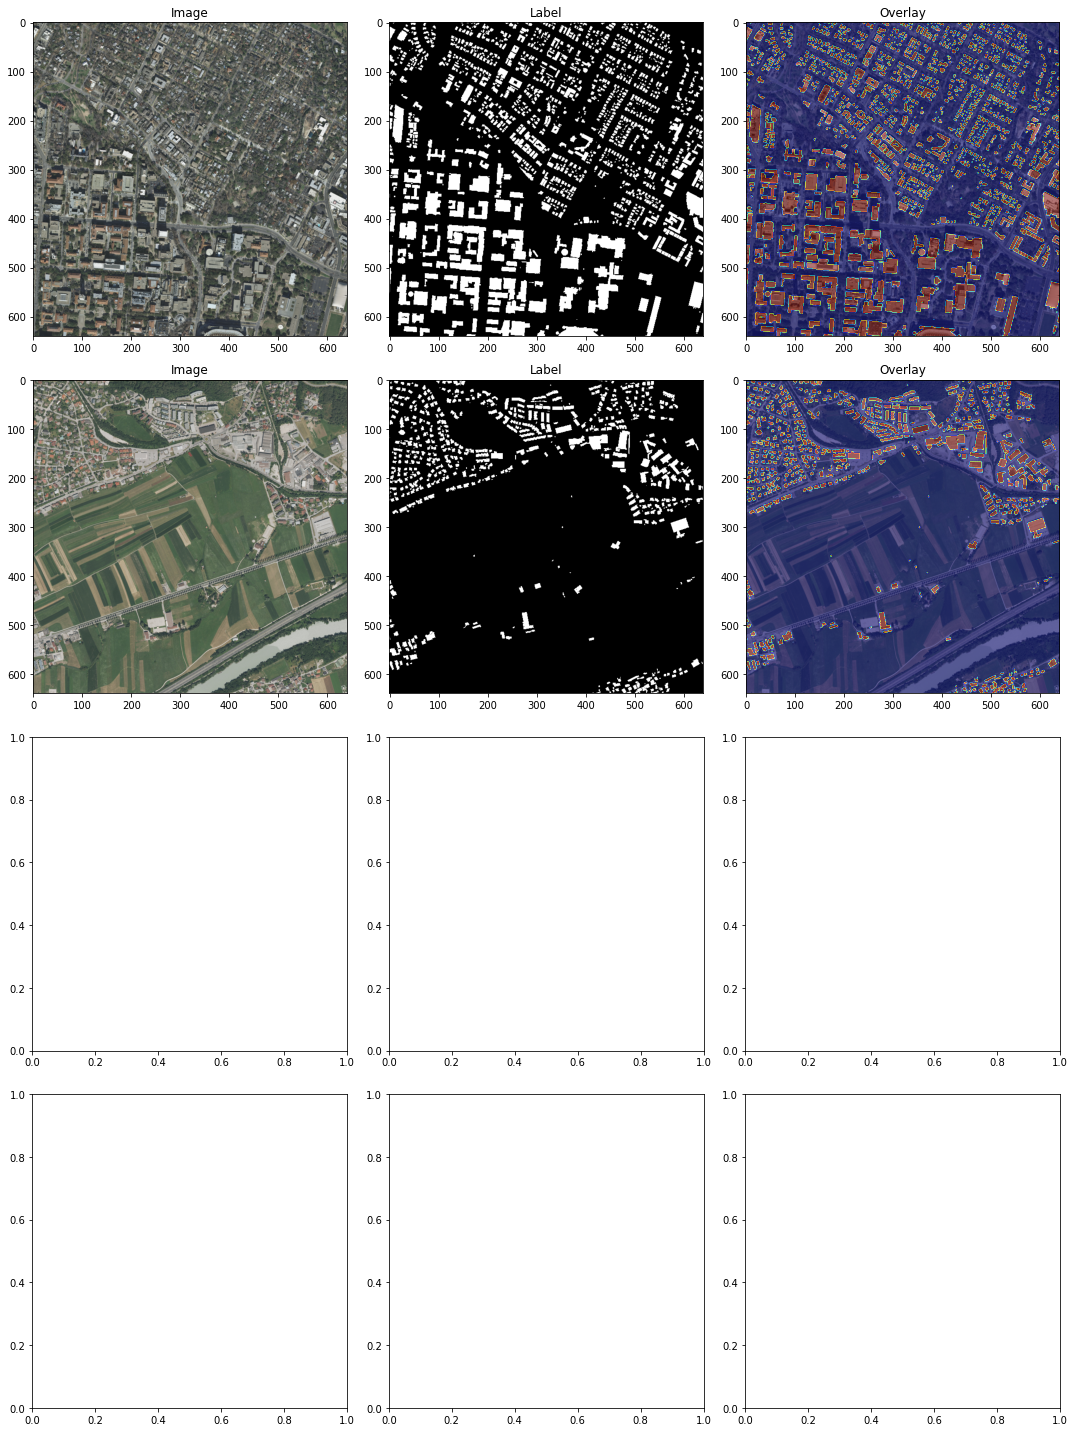

In [15]:
import matplotlib.pyplot as plt

for images, masks in train_dataloader:
    print("Unique Mask Values:", np.unique(masks.numpy()))  # Print unique values in masks
    print(images.shape, masks.shape)
    
    # Plotting the images and masks
    fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
    
    for idx, (image, mask) in enumerate(zip(images, masks)):
        image_np = image.numpy().astype('uint8')
        mask_np = mask.numpy().squeeze()
        
        ax[idx, 0].imshow(image_np)
        ax[idx, 0].set_title('Image')
        #ax[idx, 0].axis('off')
        
        ax[idx, 1].imshow(mask_np, cmap='gray')
        ax[idx, 1].set_title('Label')
        #ax[idx, 1].axis('off')
        
        ax[idx, 2].imshow(image_np)
        ax[idx, 2].imshow(mask_np, cmap='jet', alpha=0.5)  # Overlay mask with transparency
        ax[idx, 2].set_title('Overlay')
        #ax[idx, 2].axis('off')
    
    plt.tight_layout()
    plt.show()
    break

In [19]:
for images, masks in train_dataloader:
    print(images.shape)
    print(mask.shape)
    result = model(images)
    print(result.shape)
    break

<ipython-input-11-0d0931f6b6c7>:24: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  label = label.resize((img_size, img_size), Image.NEAREST)


(2, 640, 640, 3)
(640, 640, 1)
(2, 640, 640, 3)


In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models, losses
from tensorflow.keras.metrics import MeanIoU
from tensorflow_addons.losses import SigmoidFocalCrossEntropy

class FocalLoss(tf.keras.losses.Loss):
    def __init__(self, alpha=1, gamma=2, ignore_index=0, reduction='auto', name='focal_loss'):
        super().__init__(name=name, reduction=reduction)
        self.alpha = alpha
        self.gamma = gamma
        self.ignore_index = ignore_index

    def call(self, y_true, y_pred):
        y_true = tf.argmax(y_true, axis=-1)
        BCE_loss = losses.sparse_categorical_crossentropy(y_true, y_pred, from_logits=True)
        pt = tf.exp(-BCE_loss)
        F_loss = self.alpha * (1-pt)**self.gamma * BCE_loss
        
        return tf.reduce_mean(F_loss)


class LitDUCKNet(tf.keras.Model):
    def __init__(self, img_height, img_width, input_channels, out_classes, starting_filters):
        super(LitDUCKNet, self).__init__()
        self.model = DUCK_Net.create_model(img_height=img_height, img_width=img_width, 
                                           input_channels=input_channels, out_classes=out_classes, 
                                           starting_filters=starting_filters)

    def call(self, inputs):
        return self.model(inputs)

/home/nplab/.local/lib/python3.8/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/home/nplab/.local/lib/python3.8/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.11.0 and strictly below 2.14.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make

In [22]:
# 모델 생성 및 컴파일
model = DUCK_Net.create_model(img_height=img_size, img_width=img_size, input_chanels=3, out_classes=1, starting_filters=filters)
model.compile(optimizer='adam', 
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), 
              metrics=['accuracy', tf.keras.metrics.MeanIoU(num_classes=2)])

model.fit(train_dataset, 
          epochs=10,  
          validation_data=val_dataset)


Starting DUCK-Net
Epoch 1/10


/home/nplab/.local/lib/python3.8/site-packages/keras/backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
<ipython-input-11-0d0931f6b6c7>:24: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  label = label.resize((img_size, img_size), Image.NEAREST)


      1/Unknown - 18s 18s/step - loss: 1.0935 - accuracy: 0.4123 - mean_io_u_3: 0.4432

ResourceExhaustedError: Graph execution error:

2 root error(s) found.
  (0) RESOURCE_EXHAUSTED:  OOM when allocating tensor with shape[18,214,214,17] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node model_4/conv2d_1341/Conv2D-0-0-TransposeNCHWToNHWC-LayoutOptimizer}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.

	 [[confusion_matrix/assert_non_negative_1/assert_less_equal/Assert/AssertGuard/pivot_f/_12/_41]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.

  (1) RESOURCE_EXHAUSTED:  OOM when allocating tensor with shape[18,214,214,17] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node model_4/conv2d_1341/Conv2D-0-0-TransposeNCHWToNHWC-LayoutOptimizer}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.

0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_298282]

In [ ]:
for images, masks in train_dataloader:
    print(images.shape)
    result = model(images)
    print(result.shape)
    break